In [ ]:
nltk.download()

In [2]:
#Importing libraries
import json,pandas as pd
import re
from nltk.corpus import stopwords #JUSTIFYING THE NAME OF OUR GROUP BY USING NLTK.CORPUS
import matplotlib.pyplot as plt

In [40]:
#Reading the sample file
with open('Sample_Data/B000E7T7JO.json', 'rb') as file:
    File = json.load(file)

In [41]:
x = File['Reviews']

In [42]:
df = pd.DataFrame(x)

In [43]:
df

,Author,Content,Date,Overall,ReviewID,Title
0,Renee A.,the one i was sent was the silver not blue ver...,"May 2, 2006",4.0,R1XV15PBPT4F3N,Good and simple phone.
1,Fortran guy,I bought this phone mainly to use in Italy for...,"December 27, 2008",3.0,R2NZE1TJ8U4OM6,OK phone --- but it is *NOT* unlocked
2,R. Truderung,Easy to uselong battery lifegood features if l...,"June 24, 2006",5.0,R2QVOAB2V519JB,simple & easy
3,A. Wiedlea,"The phone was not unlocked as advertised, and ...","November 22, 2008",1.0,R1W6775KPGPV8U,Not Unlocked
4,"Lost Soul ""TKW""",This is an excellent basic phone. No complain...,"April 25, 2008",5.0,RLE7RNJVY2LB2,Motorola V-190 Cell Phone
5,Preston A. Cannedy,"This phone was advertised as ""Unlocked"". When ...","December 20, 2008",1.0,R1VTP8P1NIPP9Q,Mototola V190 Unlocked Cell Phone-U.S. Version
6,"Not Happy ""ARD""","Ordered the UNLOCKED V190 in black, Amazon sen...","December 22, 2008",1.0,R3OYSRHKVO6TZ0,Amazon sent the WRONG phone
7,Rafael G. Lopez,Got the phone. It was indeed unlocked.But it w...,"January 6, 2009",2.0,R3OS5MYOLR61SZ,"unlocked, but blocked"
8,J. DeStefano,Pros:Battery Life (with the 1100 mah battery p...,"April 5, 2009",5.0,R38WGOF18QIXR6,Excellent Basic Phone & Unlocked
9,"J. White ""Animal Lover""",Like others have said. The order was switch f...,"November 5, 2008",1.0,R2RDRAY291PM09,Switch Phones


In [44]:
#Converting the Review text into lower case
low_df = df.Content.str.lower()
low_df[:5]

0    the one i was sent was the silver not blue ver...
1    i bought this phone mainly to use in italy for...
2    easy to uselong battery lifegood features if l...
3    the phone was not unlocked as advertised, and ...
4    this is an excellent basic phone.  no complain...
Name: Content, dtype: object

### Spliting the review text into words

In [45]:
split_df = low_df.str.split(' ').to_frame('words')
split_df.head()

,words
0,"[the, one, i, was, sent, was, the, silver, not..."
1,"[i, bought, this, phone, mainly, to, use, in, ..."
2,"[easy, to, uselong, battery, lifegood, feature..."
3,"[the, phone, was, not, unlocked, as, advertise..."
4,"[this, is, an, excellent, basic, phone., , no,..."


### Joining the words to the original dataframe

In [46]:
df = df.join(split_df)
df.head()

,Author,Content,Date,Overall,ReviewID,Title,words
0,Renee A.,the one i was sent was the silver not blue ver...,"May 2, 2006",4.0,R1XV15PBPT4F3N,Good and simple phone.,"[the, one, i, was, sent, was, the, silver, not..."
1,Fortran guy,I bought this phone mainly to use in Italy for...,"December 27, 2008",3.0,R2NZE1TJ8U4OM6,OK phone --- but it is *NOT* unlocked,"[i, bought, this, phone, mainly, to, use, in, ..."
2,R. Truderung,Easy to uselong battery lifegood features if l...,"June 24, 2006",5.0,R2QVOAB2V519JB,simple & easy,"[easy, to, uselong, battery, lifegood, feature..."
3,A. Wiedlea,"The phone was not unlocked as advertised, and ...","November 22, 2008",1.0,R1W6775KPGPV8U,Not Unlocked,"[the, phone, was, not, unlocked, as, advertise..."
4,"Lost Soul ""TKW""",This is an excellent basic phone. No complain...,"April 25, 2008",5.0,RLE7RNJVY2LB2,Motorola V-190 Cell Phone,"[this, is, an, excellent, basic, phone., , no,..."


### Removing Stopwords and special characters 

In [3]:
#Loading Stopwords from nltk package
stopwords = set(stopwords.words('english'))

In [48]:
#Removing stop words and all special characters except $ as it is important in the review
cleaned_df = df['words'].apply(lambda words: [re.sub('[^a-zA-Z0-9$]','',word) for word in words if word not in stopwords]).to_frame('cleaned_words')
cleaned_df.head()

,cleaned_words
0,"[one, sent, silver, blue, version, overall, li..."
1,"[bought, phone, mainly, use, italy, extended, ..."
2,"[easy, uselong, battery, lifegood, features, l..."
3,"[phone, unlocked, advertised, imei, unlock, co..."
4,"[excellent, basic, phone, , complaints, whatev..."


#### JOINING THE 'cleaned_words' TO THE DATA FRAME

In [49]:
df = df.join(cleaned_df)
df.head()

,Author,Content,Date,Overall,ReviewID,Title,words,cleaned_words
0,Renee A.,the one i was sent was the silver not blue ver...,"May 2, 2006",4.0,R1XV15PBPT4F3N,Good and simple phone.,"[the, one, i, was, sent, was, the, silver, not...","[one, sent, silver, blue, version, overall, li..."
1,Fortran guy,I bought this phone mainly to use in Italy for...,"December 27, 2008",3.0,R2NZE1TJ8U4OM6,OK phone --- but it is *NOT* unlocked,"[i, bought, this, phone, mainly, to, use, in, ...","[bought, phone, mainly, use, italy, extended, ..."
2,R. Truderung,Easy to uselong battery lifegood features if l...,"June 24, 2006",5.0,R2QVOAB2V519JB,simple & easy,"[easy, to, uselong, battery, lifegood, feature...","[easy, uselong, battery, lifegood, features, l..."
3,A. Wiedlea,"The phone was not unlocked as advertised, and ...","November 22, 2008",1.0,R1W6775KPGPV8U,Not Unlocked,"[the, phone, was, not, unlocked, as, advertise...","[phone, unlocked, advertised, imei, unlock, co..."
4,"Lost Soul ""TKW""",This is an excellent basic phone. No complain...,"April 25, 2008",5.0,RLE7RNJVY2LB2,Motorola V-190 Cell Phone,"[this, is, an, excellent, basic, phone., , no,...","[excellent, basic, phone, , complaints, whatev..."


### Load the complete dataset

In [4]:
Full_df = pd.read_pickle('/home/mukund/full_dataset/full_dataset')
Full_df = Full_df.reset_index()  #Resetting the index

### Extracting the name of the Make 

In [5]:
Full_df['Name'].isnull().sum()

10685

In [6]:
Full_df['Name'] = Full_df['Name'].str.lower()

In [7]:
Company_name_df = Full_df['Name'][Full_df['Name'].notnull()].str.split().str.get(0).to_frame('Make')
Company_name_df.head()

,Make
5,htc
6,htc
7,htc
8,htc
9,htc


In [8]:
temp = Full_df

### Joining the 'Company_name_df' to the complete dataset

In [66]:
Full_df = temp.join(Company_name_df)
Full_df.tail()

,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title,Make
186011,3,COre61,I just bought this phone and I really like it...,"March 29, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",5.0,$119.99,B00JP6PGTU,R10XTTJTENA5HL,great value,cubot
186012,4,Dede Sofyan,"High quality smartphone,I really like it..I wi...","April 25, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",5.0,$119.99,B00JP6PGTU,RX14H9B2RFQID,Amazing,cubot
186013,5,Dave C,I bought this phone since I had had luck with ...,"April 7, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",2.0,$119.99,B00JP6PGTU,R1TEI321M6L4K,Used for 2 hours then returned,cubot
186014,6,Zion,"I actually haven't have the phone yet, but hea...","May 1, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",4.0,$119.99,B00JP6PGTU,R8PR1WVSCR3GO,Good phone,cubot
186015,7,Barrie J. Lynch,It was not as advertised. It would not send o...,"April 13, 2014",5.0 inch large capacitive screen with 960*540 ...,http://ecx.images-amazon.com/images/I/41OprWWf...,"cubot p9 5.0"" capacitive touch screen mtk6572a...",3.0,$119.99,B00JP6PGTU,RP6KYN4EUVG25,Cubot,cubot


### Now, applying the same cleaning of text on the complete dataset

In [67]:
#Dropping the rows with no review
Full_df = Full_df[pd.notnull(Full_df['Content'])]

In [68]:
stopwords_custom = {'phone','phones','would','could'}
stopwords = set(STOPWORDS) | stopwords_custom

In [69]:
Full_low_df = Full_df.Content.str.lower()
Full_split_df = Full_low_df.str.split(' ').to_frame('words')
Full_df = Full_df.join(Full_split_df)
Full_df['words'] = Full_df['words'].apply(lambda words: [re.sub('[^a-zA-Z0-9$]','',word) for word in words]) 
Full_cleaned_df = Full_df['words'].apply(lambda words: [word for word in words if len(word)>2 and word not in stopwords]).to_frame('cleaned_words')
Full_df = Full_df.join(Full_cleaned_df)

In [70]:
Full_df.head()

,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title,Make,words,cleaned_words
0,0,Dustin,Product came exactly as described and would re...,"March 10, 2014",None,None,None,5.0,None,1466736038,RYYNWQWW6LAC1,Great,NaN,"[product, came, exactly, as, described, and, w...","[product, came, exactly, described, recommend,..."
1,1,Lancerman,I am very pleased with the phone we received. ...,"March 27, 2014",None,None,None,5.0,None,1466736038,R2G160TW2JWGD8,Excellent phone.,NaN,"[i, am, very, pleased, with, the, phone, we, r...","[pleased, received, genuine, samsung, purchase..."
2,2,Maranda,The Samsung Galazy S3 is one of the best phone...,"April 3, 2014",None,None,None,5.0,None,1466736038,R3P9IS2JNG68K2,As described and a great phone,NaN,"[the, samsung, galazy, s3, is, one, of, the, b...","[samsung, galazy, one, best, ive, ever, used, ..."
3,0,Jackie C,"The television was a refurbished one, and for ...","April 13, 2014",None,None,None,4.0,None,8987029395,R3LDJA7HU2Q0FS,nice television for the price,NaN,"[the, television, was, a, refurbished, one, an...","[television, refurbished, one, price, quality,..."
4,1,Sonja Trokey,Delivery was very prompt. The picture of this...,"April 1, 2014",None,None,None,4.0,None,8987029395,RAQB0MR9LGA2G,Service and product quality very good.,NaN,"[delivery, was, very, prompt, , the, picture, ...","[delivery, prompt, picture, great, clear, imag..."


### Dataset after extracting the Make name and removing stopwords, punctuations, special characters. 

In [71]:
Full_df[200:205]

,index,Author,Content,Date,Features,ImgURL,Name,Overall,Price,ProductID,ReviewID,Title,Make,words,cleaned_words
200,63,Samantha G,"I love the look and style of this phone, but b...","July 28, 2005",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,2.0,Unavailable,B0000AZVVA,R32WHMKXKLGYPT,Worst reception ever,sony,"[i, love, the, look, and, style, of, this, pho...","[love, look, style, far, worst, reception, ive..."
201,64,"Malik ""Malik""",This phone is loaded with bells and whistles. ...,"November 12, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,5.0,Unavailable,B0000AZVVA,RO283E5WJKKS,Excellent phone for the buck,sony,"[this, phone, is, loaded, with, bells, and, wh...","[loaded, bells, whistles, one, best, ever, own..."
202,65,TheTechGuy,Lots of people here are complaining about the ...,"September 16, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,4.0,Unavailable,B0000AZVVA,R16H03E40F2UNI,Ring tone fun with t616,sony,"[lots, of, people, here, are, complaining, abo...","[lots, people, complaining, lack, mp3, rington..."
203,66,Todd Clements,"I've had this phone since November, and been v...","June 3, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,4.0,Unavailable,B0000AZVVA,R12U012AWLR36K,A great tiny phone with good batteries,sony,"[ive, had, this, phone, since, november, and, ...","[ive, since, november, happy, overall, main, a..."
204,67,None,"okay, I've had this phone for 6 months now tho...","May 28, 2004",NULL,NULL,sony ericsson t616 - cellular phone - gsm - bar,1.0,Unavailable,B0000AZVVA,R13VEB53W27QKA,pain in the ass!,sony,"[okay, ive, had, this, phone, for, 6, months, ...","[okay, ive, months, now, though, tmobile, than..."


### Calculating average ratings according to Make.

In [64]:
temp = Full_df

In [109]:
temp['Make'] = temp['Make'].str.replace('[^a-zA-Z]','')

In [65]:
temp['Overall'] = temp['Overall'].apply(pd.to_numeric)

In [110]:
count  = temp.groupby(['Make'])['Overall'].count()
mean  = temp.groupby(['Make'])['Overall'].mean()

In [111]:
mean_df = mean.to_frame('mean').reset_index()
count_df = count.to_frame('count').reset_index()

In [116]:
make_cnt_avg_df = pd.merge(mean_df,count_df,on='Make')

In [147]:
make_cnt_avg_df = make_cnt_avg_df.loc[(make_cnt_avg_df['count']>=100)]
make_cnt_avg_df.head()

,Make,mean,count
0,,3.541775,766
2,alcatel,3.714286,476
5,android,3.197861,187
6,apple,3.592496,12314
8,att,3.577229,1256


In [121]:
make_cnt_avg_df.loc[(make_cnt_avg_df['count']>=2000)]

,Make,mean,count
6,apple,3.592496,12314
14,blackberry,3.344922,10556
15,blu,3.868626,6942
54,generic,2.113208,2491
67,htc,3.564413,9897
88,lg,3.713149,18731
102,motorola,3.786119,17103
112,nokia,3.852765,17815
143,samsung,3.811555,38149
157,sony,3.912902,7681


In [137]:
x = make_cnt_avg_df.loc[(make_cnt_avg_df['count']>=2000)]

### Plot showing Make vs Average Rating

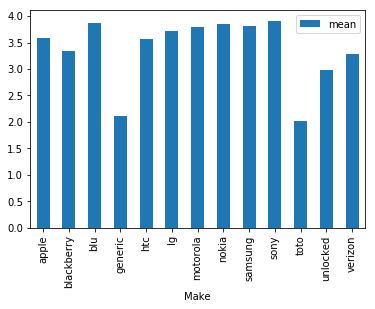

In [150]:
x.plot('Make','mean',kind='bar')
plt.show()

### WordClouds at Make level

In [25]:
from collections import Counter

In [64]:
from wordcloud import WordCloud,STOPWORDS

In [94]:
#Function to get all the cleaned words for a specific make.
def get_words(make):
    t_list = []
    for word in Full_df['cleaned_words'].loc[(Full_df['Make'] == make)]:
            t_list = t_list+word
    return t_list

### WordCloud for the reviews of Apple

In [96]:
#Generating list of words for the make 'apple'
t_list = get_words('apple')  

In [109]:
#Calculating the word counts
count = Counter(t_list)

for i,j in count.most_common(20):
    print j,i

10397 iphone
4677 new
4514 apple
3475 one
3275 great
2878 good
2824 use
2741 will
2121 unlocked
2076 product
1938 buy
1922 screen
1915 time
1887 dont
1819 got
1816 works
1751 really
1750 battery
1703 love
1702 bought


In [90]:
#Generating WordCloud
wc = WordCloud(width=3000,height=2000, max_words=1000, margin=20,
               random_state=1).generate(" ".join(str(x) for x in t_list))

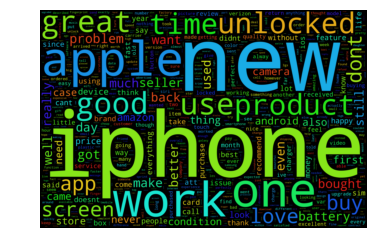

In [91]:
#Displyaing WordCloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### WordCloud for the reviews of Samsung

In [98]:
sam_list = get_words('samsung')

In [110]:
count = Counter(sam_list)
for i,j in count.most_common(20):
    print j,i

14621 one
14193 use
13694 great
13332 screen
13201 samsung
13019 good
12125 battery
12106 will
8128 galaxy
8120 dont
8082 time
7703 really
7488 even
7408 love
7400 new
6955 also
6790 android
6525 now
6474 much
6424 works


In [102]:
wc_sam = WordCloud(width=2000,height=1500, max_words=1000, margin=20,
               random_state=1).generate(" ".join(str(x) for x in sam_list))

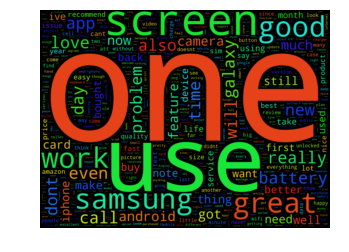

In [103]:
plt.imshow(wc_sam, interpolation='bilinear')
plt.axis("off")
plt.show()